 ## プログラムの流れ説明
①ライブラリ読み込み<br>
②学習して検証する機能を定義した関数<br>
③NMISTデータを読み込み学習用データを検証用データを作成する。サンプルを25個ランダムに抽出して表示させる。これら機能を定義した関数<br>
④スクリプト実行<br>

In [1]:
#必要なライブラリを読み込む
from matplotlib import pyplot as plt
from matplotlib import cm #カラーマップを使うため
%matplotlib inline

import numpy as np
from sklearn import datasets

from sklearn import model_selection
from sklearn import svm
from sklearn import metrics

In [2]:
#SVMアルゴリズムと交差検証法を用いて、学習・評価する関数を定義する
def digits_svm(X,y):
    scores = [] #５回分の評価ストアを保存するためのリスト
    
    # K-fold 交差検証でアルゴリズムの汎化性能を調べる
    kfold = model_selection.KFold(n_splits=5) #5個の学習用/評価用のデータに分割
    
    for train, test in kfold.split(X): #1回ずつモデルを作り評価している（５回繰り替えす）
        # デフォルトのカーネルは rbf になっている
        model = svm.SVC(C=2**2, gamma=2**-11) #引数の意味を知りたい場合、公式ドキュメント参照
        # 訓練データで学習する
        model.fit(X[train], y[train])
        # テストデータの正答率を調べる
        score = metrics.accuracy_score(model.predict(X[test]), y[test])
        scores.append(score)

    # 最終的な正答率を出す。５回のスコアの平均を求めている
    accuracy = (sum(scores) / len(scores)) * 100
    msg = '正答率: {accuracy:.2f}%'.format(accuracy=accuracy)
    print(msg)

In [3]:
#main関数を定義する
def main():
    digits = datasets.load_digits() #NMISTデータ読み込み
    #説明変数と目的変数を作成
    X = digits.data
    y = digits.target

    #データの特徴を確認している
    print('データセットの点数: {N}'.format(N=X.shape[0]))
    print('各データの次元数: {dimension}'.format(dimension=X.shape[1]))

    # データの中から 25 点を無作為に選び出し、描画しているだけ
    p = np.random.randint(0, len(X), 25)

    # 選んだデータとラベルを matplotlib で表示する
    samples = np.array(list(zip(X, y)))[p]
    for index, (data, label) in enumerate(samples):
        # 画像データを 5x5 の格子状に配置する
        plt.subplot(5, 5, index + 1)
        # 軸に関する表示はいらない
        plt.axis('off')
        # データを 8x8 のグレースケール画像として表示する
        plt.imshow(data.reshape(8, 8), cmap=cm.gray_r, interpolation='nearest')
        # 画像データのタイトルに正解ラベルを表示する
        plt.title(label, color='red')

    # グラフを表示する
    plt.show()
    
    # svmで分類する
    digits_svm(X,y) # 上のdigits_svm関数を実行する

データセットの点数: 1797
各データの次元数: 64


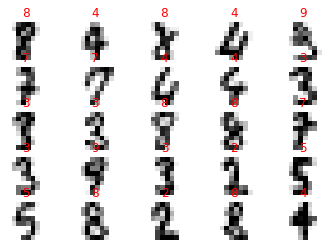

正答率: 97.44%


In [4]:
#main実行    
if __name__ == '__main__':
    main() #上のmain関数を実行する